<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Topic Modeling
## *Data Science Unit 4 Sprint 1 Assignment 4*

Analyze a corpus of Amazon reviews from Unit 4 Sprint 1 Module 1's lecture using topic modeling: 

- Fit a Gensim LDA topic model on Amazon Reviews
- Select appropriate number of topics
- Create some dope visualization of the topics
- Write a few bullets on your findings in markdown at the end
- **Note**: You don't *have* to use generators for this assignment

In [1]:
import numpy as np
import gensim
import os
import re
from ast import literal_eval

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora
import pyLDAvis.gensim

from gensim.models.ldamulticore import LdaMulticore

import pandas as pd
import tqdm

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [3]:
df['sentiment'] = df['reviews.rating'].apply(lambda x: 'Positive' if x >3 else 'Negative')
df.head(20)

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,sentiment
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht...",Negative
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht...",Positive
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht...",Positive
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht...",Positive
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht...",Positive
5,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Bought a lot of batteries for Christmas and th...,... batteries for Christmas and the AmazonBasi...,ByPainter Marlow,"https://www.barcodable.com/upc/841710106442,ht...",Positive
6,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00

In [4]:
import spacy
nlp = spacy.load("en_core_web_lg")

def get_lemmas(text):
    lemmas = []
    doc = nlp(text)
    for token in doc:
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'): lemmas.append(token.lemma_)
    
    return lemmas

In [5]:
df['keywords'] = df['reviews.text'].apply(get_lemmas)
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,sentiment,keywords
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht...",Negative,"[order, 3, item, bad, quality, miss, backup, s..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht...",Positive,"[bulk, expensive, way, product, like]"
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht...",Positive,"[Duracell, price, happy]"
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht...",Positive,"[work, brand, battery, well, price]"
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht...",Positive,"[battery, long, last, price, great]"


In [6]:
stop_words = [
    'bought',
    'amazon',
]

import spacy
nlp = spacy.load('en_core_web_lg')

In [7]:
stops = nlp.Defaults.stop_words.union(stop_words)

In [8]:
df['keywords'][2]

['Duracell', 'price', 'happy']

In [9]:
def remove_stops(_list_):
    
    keywords = []
    
    for keyword in _list_:
        
        phrase = []
        
        words = keyword.split()
        
        for word in words:
            if word in stops:
                pass
            else: 
                phrase.append(word)
            
        phrase = ' '.join(phrase)
        
        if len(phrase) > 0:
            keywords.append(phrase)
    
    return keywords

In [10]:
from tqdm import tqdm

tqdm.pandas()

df['keywords'] = df['keywords'].progress_apply(remove_stops)

100%|██████████| 28332/28332 [00:00<00:00, 134754.39it/s]


In [11]:
df['keywords'][42]

['battery',
 '10',
 '12',
 'window',
 'candle',
 'buy',
 '2',
 'Duracell',
 '2',
 'Amazon',
 'Batteries',
 '10',
 'day',
 'Duracell',
 '12',
 'experiment',
 'consistent',
 'Duracell',
 'average',
 '17',
 'longer']

In [12]:
# Dict representation of all our keywords
id2word = corpora.Dictionary(df['keywords'])

In [14]:
id2word.filter_extremes(no_below=5, no_above=0.95)
corpus = [id2word.doc2bow(text) for text in df['keywords']]
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   num_topics=20,
                   passes=50, 
                   workers=12
                  )

In [15]:
lda.print_topics()

[(0,
  '0.036*"app" + 0.036*"time" + 0.034*"use" + 0.029*"set" + 0.024*"access" + 0.022*"like" + 0.022*"game" + 0.022*"book" + 0.022*"kid" + 0.020*"able"'),
 (1,
  '0.071*"child" + 0.068*"tablet" + 0.052*"great" + 0.040*"purchase" + 0.026*"love" + 0.024*"Friday" + 0.022*"young" + 0.022*"buy" + 0.020*"sale" + 0.018*"product"'),
 (2,
  '0.047*"tablet" + 0.036*"Amazon" + 0.034*"app" + 0.023*"screen" + 0.018*"$" + 0.016*"Google" + 0.014*"device" + 0.013*"price" + 0.013*"store" + 0.010*"use"'),
 (3,
  '0.139*"work" + 0.055*"buy" + 0.041*"gift" + 0.036*"Christmas" + 0.028*"far" + 0.026*"like" + 0.026*"fine" + 0.025*"expect" + 0.022*"great" + 0.021*"issue"'),
 (4,
  '0.066*"use" + 0.060*"easy" + 0.050*"tablet" + 0.048*"great" + 0.048*"size" + 0.029*"recommend" + 0.029*"read" + 0.026*"screen" + 0.024*"perfect" + 0.021*"book"'),
 (5,
  '0.131*"old" + 0.124*"year" + 0.045*"love" + 0.037*"buy" + 0.036*"3" + 0.035*"use" + 0.030*"2" + 0.027*"4" + 0.023*"easy" + 0.020*"tablet"'),
 (6,
  '0.201*"grea

In [19]:
words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()]
topics = [' '.join(t[0:5]) for t in words]
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
app time use set access

------ Topic 1 ------
child tablet great purchase love

------ Topic 2 ------
tablet Amazon app screen $

------ Topic 3 ------
work buy gift Christmas far

------ Topic 4 ------
use easy tablet great size

------ Topic 5 ------
old year love buy 3

------ Topic 6 ------
great price good product work

------ Topic 7 ------
tablet app play game work

------ Topic 8 ------
kid tablet great friendly user

------ Topic 9 ------
love buy tablet use easy

------ Topic 10 ------
charge come battery buy problem

------ Topic 11 ------
kindle Kindle fire Fire love

------ Topic 12 ------
music buy tablet home item

------ Topic 13 ------
battery long brand work buy

------ Topic 14 ------
card tablet memory case add

------ Topic 15 ------
year old love tablet time

------ Topic 16 ------
read book light Kindle easy

------ Topic 17 ------
easy use thank good tablet

------ Topic 18 ------
tablet need good iPad want

------ Topic 19 ------
good rea

In [20]:
pyLDAvis.enable_notebook()
# pyLDAvis.gensim.prepare(lda, corpus, id2word)

In [21]:
distro = [lda[doc] for doc in corpus]

In [22]:
distro[0]

[(5, 0.089736916),
 (12, 0.3066788),
 (13, 0.26825455),
 (17, 0.09058482),
 (19, 0.18222044)]

In [23]:
def update(doc):
    d_dist = {k:0 for k in range(0,20)}
    for t in doc:
        d_dist[t[0]] = t[1]
    return d_dist

new_distro = [update(doc) for doc in distro]

In [24]:
topics = pd.DataFrame.from_records(new_distro)
topics.columns = topic_labels

In [25]:
topics.head()

,"""app"", ""time"", ""use"", ""set"", ""access""","""child"", ""tablet"", ""great"", ""purchase"", ""love""","""tablet"", ""Amazon"", ""app"", ""screen"", ""$""","""work"", ""buy"", ""gift"", ""Christmas"", ""far""","""use"", ""easy"", ""tablet"", ""great"", ""size""","""old"", ""year"", ""love"", ""buy"", ""3""","""great"", ""price"", ""good"", ""product"", ""work""","""tablet"", ""app"", ""play"", ""game"", ""work""","""kid"", ""tablet"", ""great"", ""friendly"", ""user""","""love"", ""buy"", ""tablet"", ""use"", ""easy""","""charge"", ""come"", ""battery"", ""buy"", ""problem""","""kindle"", ""Kindle"", ""fire"", ""Fire"", ""love""","""music"", ""buy"", ""tablet"", ""home"", ""item""","""battery"", ""long"", ""brand"", ""work"", ""buy""","""card"", ""tablet"", ""memory"", ""case"", ""add""","""year"", ""old"", ""love"", ""tablet"", ""time""","""read"", ""book"", ""light"", ""Kindle"", ""easy""","""easy"", ""use"", ""thank"", ""good"", ""tablet""","""tablet"", ""need"", ""good"", ""iPad"", ""want""","""good"", ""reader"", ""quality"", ""great"", ""excellent"""
0,0.0000,0.0000,0.0000,0.0000,0.0000,0.089737,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.306679,0.268255,0.0000,0.0000,0.0000,0.090585,0.000000,0.18222
1,0.0000,0.0000,0.0000,0.0000,0.0000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000000,0.328300,0.0000,0.0000,0.0000,0.000000,0.521694,0.00000
2,0.0125,0.0125,0.0125,0.0125,0.0125,0.012500,0.211759,0.0125,0.0125,0.0125,0.0125,0.0125,0.012500,0.563233,0.0125,0.0125,0.0125,0.012500,0.012500,0.01250
3,0.0100,0.0100,0.0100,0.0100,0.0100,0.010000,0.246112,0.0100,0.0100,0.0100,0.0100,0.0100,0.010000,0.573887,0.0100,0.0100,0.0100,0.010000,0.010000,0.01000
4,0.0100,0.0100,0.0100,0.0100,0.0100,0.010000,0.428969,0.0100,0.0100,0.0100,0.0100,0.0100,0.010000,0.391031,0.0100,0.0100,0.0100,0.010000,0.010000,0.01000


In [26]:
df['primary_topic'] = topics.idxmax(axis=1)

In [27]:
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,sentiment,keywords,primary_topic
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht...",Negative,"[order, 3, item, bad, quality, miss, backup, s...","""music"", ""buy"", ""tablet"", ""home"", ""item"""
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht...",Positive,"[bulk, expensive, way, product, like]","""tablet"", ""need"", ""good"", ""iPad"", ""want"""
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht...",Positive,"[Duracell, price, happy]","""battery"", ""long"", ""brand"", ""work"", ""buy"""
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht...",Positive,"[work, brand, battery, price]","""battery"", ""long"", ""brand"", ""work"", ""buy"""
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht...",Positive,"[battery, long, price, great]","""great"", ""price"", ""good"", ""product"", ""work"""


In [28]:
df['primary_topic'].value_counts()

"battery", "long", "brand", "work", "buy"            5969
"great", "price", "good", "product", "work"          4328
"love", "buy", "tablet", "use", "easy"               2203
"use", "easy", "tablet", "great", "size"             1610
"read", "book", "light", "Kindle", "easy"            1395
"work", "buy", "gift", "Christmas", "far"            1326
"kindle", "Kindle", "fire", "Fire", "love"           1151
"old", "year", "love", "buy", "3"                    1001
"good", "reader", "quality", "great", "excellent"     973
"charge", "come", "battery", "buy", "problem"         911
"tablet", "need", "good", "iPad", "want"              897
"kid", "tablet", "great", "friendly", "user"          880
"tablet", "Amazon", "app", "screen", "$"              851
"year", "old", "love", "tablet", "time"               783
"easy", "use", "thank", "good", "tablet"              768
"app", "time", "use", "set", "access"                 766
"child", "tablet", "great", "purchase", "love"        703
"tablet", "app

In [30]:
agg = pd.pivot_table(df, values=['reviews.text'], 
                     index=['primary_topic'], 
                     columns=['sentiment'], aggfunc='count')

In [31]:
agg = agg.reset_index()

In [33]:
agg.columns = ['primary_topic', 'negative', 'positive']
agg.head()

,primary_topic,negative,positive
0,"""app"", ""time"", ""use"", ""set"", ""access""",56,710
1,"""battery"", ""long"", ""brand"", ""work"", ""buy""",1275,4694
2,"""card"", ""tablet"", ""memory"", ""case"", ""add""",60,416
3,"""charge"", ""come"", ""battery"", ""buy"", ""problem""",307,604
4,"""child"", ""tablet"", ""great"", ""purchase"", ""love""",37,666


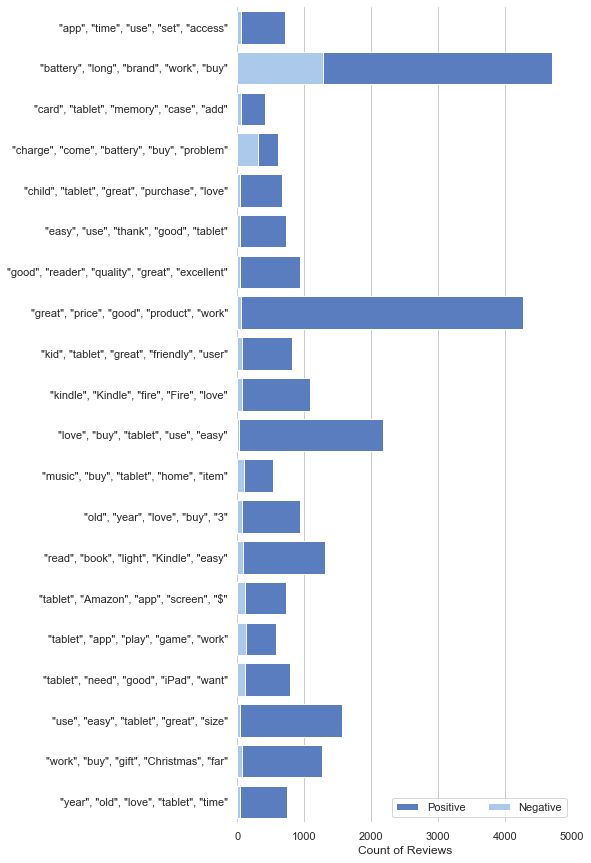

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

sns.set_color_codes('muted')
sns.barplot(x='positive', y='primary_topic', data=agg, label="Positive", color="b")

sns.set_color_codes('pastel')
sns.barplot(x='negative', y='primary_topic', data=agg, label="Negative", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0,5000), ylabel="", xlabel="Count of Reviews")
sns.despine(left=True, bottom=True)

## Stretch Goals

* Incorporate Named Entity Recognition in your analysis
* Incorporate some custom pre-processing from our previous lessons (like spacy lemmatization)
* Analyze a dataset of interest to you with topic modeling